# Método de Ondas Planas 2D

Programa para el cálculo de estructura de bandas en cristales fotónicos 2D

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#normalización
a = 1e-6

r = 0.4*a              #radio
eps1 = 9               #Permitividad del material 1
eps2 = 1               #Permitividad del material 2
precis = 5             #Número de k-points entre puntos de alta simetría
nG = 4                 #Número de ondas planas
precisStruct = 30      #Número de nodos de discretización al interior de la celda unitaria


In [3]:
#Función dieléctrica para los nodos de la malla
x = np.arange(-a/2,a/2+a/precisStruct,a/precisStruct)
y = np.arange(-a/2,a/2+a/precisStruct,a/precisStruct)

xset = list()
yset = list()
struct = np.zeros((len(x),len(x)))

for i in range(len(x)):
    for j in range(len(y)):
        if(np.sqrt(x[i]**2 + y[j]**2) < r):
            struct[i,j] = 1/eps2
            xset.append(i)
            yset.append(j)
        else:
            struct[i,j] = 1/eps1
            xset.append(i)
            yset.append(j) 
        

In [4]:
dS = (a/precisStruct)**2

xMesh = np.meshgrid(xset[0:len(xset)-1])
yMesh = np.meshgrid(yset[0:len(yset)-1])

In [5]:
structMesh = struct[0:len(xset)-1,0:len(yset)-1]*dS/(max(xset) - min(xset))**2

In [6]:
kx = np.linspace(0, np.pi/a, precis+1)
ky = np.zeros(precis+1)

kx[precis+1:2*precis+1] = np.pi/a
ky[precis+1:2*precis+1] = np.linspace(np.pi/a/precis, np.pi/a, precis)

ValueError: could not broadcast input array from shape (5,) into shape (0,)

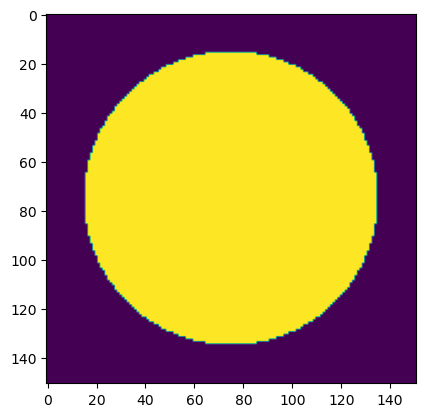

ValueError: could not broadcast input array from shape (6,) into shape (5,)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definir constantes
a = 1e-6
r = 0.4 * a
eps1 = 9
eps2 = 1
precis = 5
nG = 4
precisStruct = 150

# Inicializar struct y coordenadas
struct = np.zeros((precisStruct+1, precisStruct+1))
xSet = np.zeros(precisStruct+1)
ySet = np.zeros(precisStruct+1)

# Definir celda unitaria
for nx in range(precisStruct+1):
    countX = -a/2 + nx*a/precisStruct
    for ny in range(precisStruct+1):
        countY = -a/2 + ny*a/precisStruct
        if np.sqrt(countX**2 + countY**2) < r:
            struct[nx, ny] = 1/eps2
            xSet[nx] = countX
            ySet[ny] = countY
        else:
            struct[nx, ny] = 1/eps1
            xSet[nx] = countX
            ySet[ny] = countY

# Plot struct
plt.imshow(struct)
plt.show()

# Calcular el área de la celda de malla
dS = (a/precisStruct)**2

# Formar matrices 2D de coordenadas de nodos
xMesh, yMesh = np.meshgrid(xSet[:-1], ySet[:-1])

# Transformar valores de la función dieléctrica inversa
structMesh = struct[:-1, :-1] * dS / (max(xSet) - min(xSet))**2

# Definir la trayectoria k dentro de la zona de Brillouin
kx = np.zeros(3*precis+1)
ky = np.zeros(3*precis+1)

# GX
kx[:precis+1] = np.linspace(0, np.pi/a, precis+1)
ky[:precis+1] = 0

# XM
kx[precis+1:2*precis+1] = np.pi/a
ky[precis+1:2*precis+1] = np.linspace(0, np.pi/a, precis)

# MG
kx[2*precis+1:] = np.linspace(np.pi/a, 0, precis+1)
ky[2*precis+1:] = np.linspace(np.pi/a, 0, precis+1)
